/home/tk/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


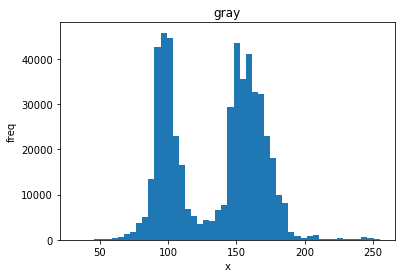

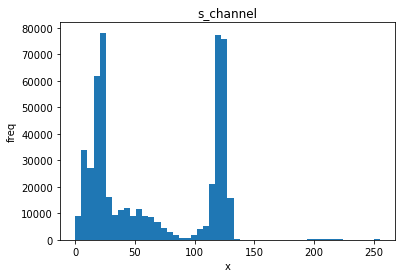

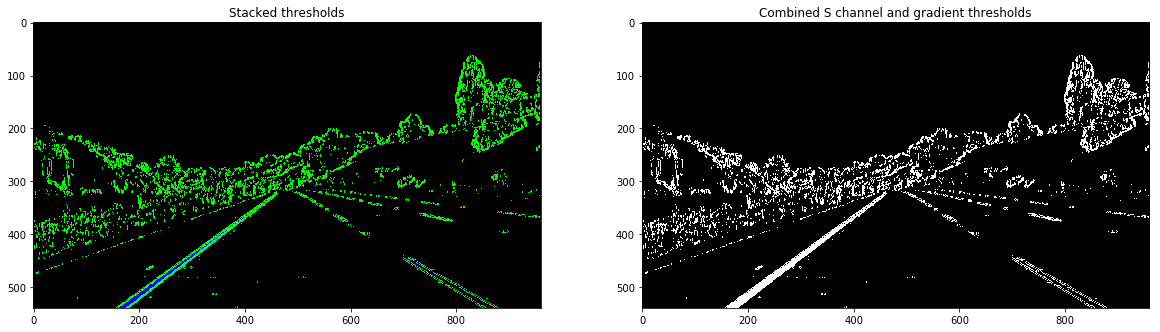

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = mpimg.imread('/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/02. Project (Finding Lane)/CarND-LaneLines-P1-master/test_images/solidYellowCurve2.jpg')


# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1



hist_ = [gray, s_channel]
name_ = ['gray', 's_channel']

for i in range(2):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.hist(hist_[i].reshape(-1,1), bins=50)
    ax.set_title(name_[i])
    ax.set_xlabel('x')
    ax.set_ylabel('freq')
    fig.show()

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))*255

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')

/home/tk/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


179.0


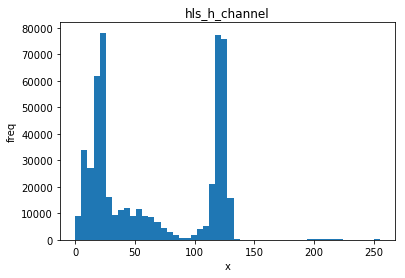

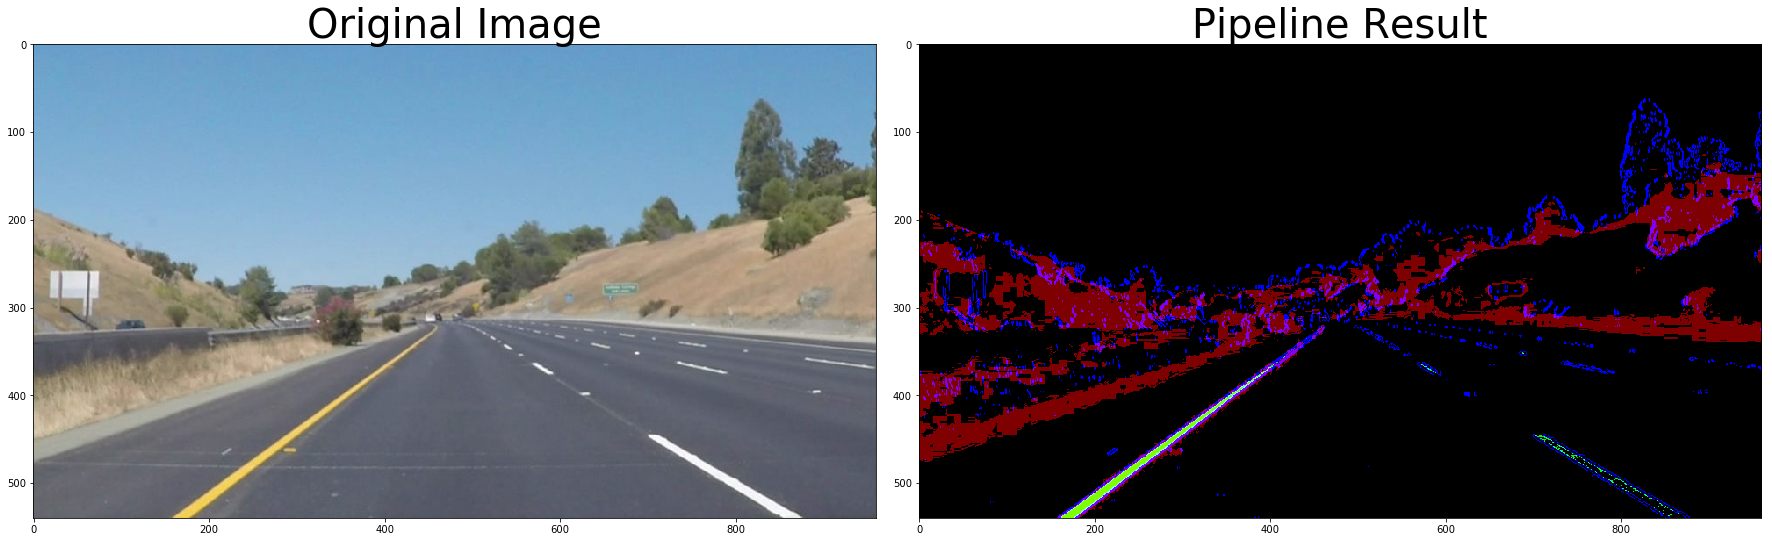

In [118]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread('/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/02. Project (Finding Lane)/CarND-LaneLines-P1-master/test_images/solidYellowCurve2.jpg')


# Edit this function to create your own pipeline.
def pipeline(img, HSV_channel=0, hsv_thresh=(170, 255), HLS_channel=2, hls_thresh=(170, 255), sobelXgrad_thresh=(20, 100)):
    img = np.copy(img)
    
    # Convert to Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Convert to HSV color space and separate the H/V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    hsv_channel = hsv[:,:,HSV_channel]
    
    # Convert to HLS color space and separate the L/S channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    hls_channel = hls[:,:,HLS_channel]

    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sobelXgrad_thresh[0]) & (scaled_sobel <= sobelXgrad_thresh[1])] = 1
    
    # Threshold HSV-H channel
    hsv_binary = np.zeros_like(hsv_channel)
    hsv_binary[(hsv_channel >= hsv_thresh[0]) & (hsv_channel <= hsv_thresh[1])] = 1

    # Threshold HLS-S channel
    hls_binary = np.zeros_like(hls_channel)
    hls_binary[(hls_channel >= hls_thresh[0]) & (hls_channel <= hls_thresh[1])] = 1
    
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.hist(hls_channel.reshape(-1,1), bins=50)
    ax.set_title('hls_h_channel')
    ax.set_xlabel('x')
    ax.set_ylabel('freq')
    fig.show()
    
    print(hsv_channel.max())

    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack((hsv_binary*.5, hls_binary, sxbinary))
    return color_binary
    
result = pipeline(img, HSV_channel=0, hsv_thresh=(20, 35), HLS_channel=2, hls_thresh=(150, 255), sobelXgrad_thresh=(30, 100))
#result = pipeline(img, hlS_thresh=(170, 255), sobelXgrad_thresh=(30, 100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

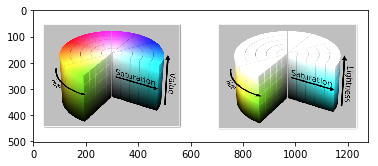

In [87]:
im = plt.imread('./colormap.png')
plt.imshow(im)
plt.show()